# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## Standard Deviation


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_OV_soft.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">November 17th, 2021</code>
</p>


In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import os.path as op
import sys
import random
from pathlib import Path

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

from helpers.helpers_predator.common import load_predator
from helpers.helpers_predator.common import export_data

# PATHS
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2021-10-24/04f37897/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2021-12-17 12:05:43 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2021-10-24\04f37897\predator.pkl is loaded successfully.


In [3]:
def get_sampled_datasets_label_counts(sampled_train_data_list):
    sampled_train_data_to_label_counts = {}
    for i, sampled_train_data in enumerate(sampled_train_data_list):
        label_counts = sampled_train_data["Mutation_Effect_Label"].value_counts()
        sampled_train_data_to_label_counts["SAMPLED_TRAIN_DATA_" + str(i + 1)] = [
            label_counts.loc[0],
            label_counts.loc[1],
        ]
    sampled_datasets_label_counts = pd.DataFrame(sampled_train_data_to_label_counts).T
    sampled_datasets_label_counts.columns = ["Disrupting", "Increasing+NoEff"]
    sampled_datasets_label_counts.index.name = "SAMPLED_TRAIN_DATA"
    sampled_datasets_label_counts.reset_index(inplace=True)
    return sampled_datasets_label_counts

In [4]:
def visualize_sampled_train_datasets_label_counts_std_dev(sampled_train_data_list, kind):

    sampled_datasets_label_counts = get_sampled_datasets_label_counts(
        sampled_train_data_list
    )

    experiment_statistics_data_melted = pd.melt(
        sampled_datasets_label_counts,
        id_vars=["SAMPLED_TRAIN_DATA"],
        value_vars=["Disrupting", "Increasing+NoEff"],
        var_name="MUTATION_EFFECT",
        value_name="LABEL_COUNT",
    )

    medians = experiment_statistics_data_melted.groupby(['MUTATION_EFFECT'])['LABEL_COUNT'].median()
    std_dev = experiment_statistics_data_melted.groupby(['MUTATION_EFFECT'])['LABEL_COUNT'].std()
    vertical_offset = experiment_statistics_data_melted['LABEL_COUNT'].median() * 0.05  # offset from median for display

    if kind in ["strip", "box"]:

        plt.figure(figsize=(3, 4))

        if kind == "strip":
            plot = sns.stripplot(
                x="MUTATION_EFFECT",
                y="LABEL_COUNT",
                data=experiment_statistics_data_melted,
                palette="ch:s=-.2,r=.6",
                jitter=True,
            )

        elif kind == "box":
            plot = sns.boxplot(
                x="MUTATION_EFFECT",
                y="LABEL_COUNT",
                data=experiment_statistics_data_melted,
                # palette="ch:s=-.2,r=.6",
            )

        for xtick in plot.get_xticks():
            plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick],
                      horizontalalignment='left', size='small', color='k')

    elif kind == "bar":
        sampled_datasets_label_counts.plot(
            figsize=(25, 4), kind="bar", color=["#E3D9C1", "#27213F"],
            title='Label Counts per Experiment', xlabel='Experiment', ylabel='Counts',
            rot=0
        )

    else:
        log_simple.error(f"Parameter `kind` must be either `strip` or `bar`, not `{kind}`")
        
    
    print(f"std_dev: {std_dev}")


std_dev: MUTATION_EFFECT
Disrupting          1.613843
Increasing+NoEff    1.613843
Name: LABEL_COUNT, dtype: float64


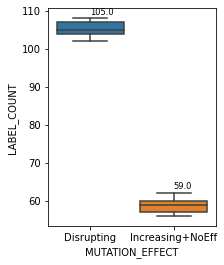

In [5]:
visualize_sampled_train_datasets_label_counts_std_dev(predator.data_materials["sampled_train_data_list"], kind='box')

### Updating Figure 2: Performance Comparison of Selected Features

In [13]:
predator.eval_metrics.scoring_metrics_data

,Provean,$\Delta\Delta$G,All Columns,SHAP Columns (5),SHAP Columns (10),SHAP Columns (20),SHAP Columns (30),SHAP Columns (40)
METRIC,,,,,,,,
ACCURACY,0.618978,0.584350,0.715106,0.714502,0.730738,0.730186,0.725688,0.720786
BALANCED_ACCURACY,0.591606,0.547086,0.653518,0.667906,0.683286,0.671928,0.667908,0.657876
F1,0.471066,0.405558,0.490624,0.535078,0.557550,0.537138,0.528764,0.505440
F1_MACRO,0.580356,0.535936,0.645164,0.661878,0.682366,0.667376,0.663596,0.656548
F1_MICRO,0.618828,0.584112,0.716668,0.714334,0.731820,0.728292,0.724788,0.721292
MCC,0.186948,0.102620,0.353610,0.364586,0.394848,0.390324,0.374264,0.368740
PRECISION,0.483546,0.425106,0.673646,0.652214,0.685924,0.690842,0.688660,0.679926
PRECISION_MACRO,0.594566,0.550850,0.705402,0.698538,0.721526,0.717536,0.717306,0.710620
PRECISION_MICRO,0.619898,0.584614,0.716386,0.716922,0.733070,0.726882,0.726092,0.719582


In [14]:
predator.eval_metrics.scoring_metrics_data.columns

Index(['Provean', '$\Delta\Delta$G', 'All Columns', 'SHAP Columns (5)',
       'SHAP Columns (10)', 'SHAP Columns (20)', 'SHAP Columns (30)',
       'SHAP Columns (40)'],
      dtype='object')

In [15]:
updated_column_names = [
    "Provean",
    "$\Delta\Delta$G",
    "PREDATOR_all",
    "PREDATOR_SHAP_top 5",
    "PREDATOR_SHAP_top 10",
    "PREDATOR_SHAP_top 20",
    "PREDATOR_SHAP_top 30",
    "PREDATOR_SHAP_top 40",
]

In [16]:
predator.eval_metrics.scoring_metrics_data.columns = updated_column_names
predator.eval_metrics.scoring_metrics_data

,Provean,$\Delta\Delta$G,PREDATOR_all,PREDATOR_SHAP_top 5,PREDATOR_SHAP_top 10,PREDATOR_SHAP_top 20,PREDATOR_SHAP_top 30,PREDATOR_SHAP_top 40
METRIC,,,,,,,,
ACCURACY,0.618978,0.584350,0.715106,0.714502,0.730738,0.730186,0.725688,0.720786
BALANCED_ACCURACY,0.591606,0.547086,0.653518,0.667906,0.683286,0.671928,0.667908,0.657876
F1,0.471066,0.405558,0.490624,0.535078,0.557550,0.537138,0.528764,0.505440
F1_MACRO,0.580356,0.535936,0.645164,0.661878,0.682366,0.667376,0.663596,0.656548
F1_MICRO,0.618828,0.584112,0.716668,0.714334,0.731820,0.728292,0.724788,0.721292
MCC,0.186948,0.102620,0.353610,0.364586,0.394848,0.390324,0.374264,0.368740
PRECISION,0.483546,0.425106,0.673646,0.652214,0.685924,0.690842,0.688660,0.679926
PRECISION_MACRO,0.594566,0.550850,0.705402,0.698538,0.721526,0.717536,0.717306,0.710620
PRECISION_MICRO,0.619898,0.584614,0.716386,0.716922,0.733070,0.726882,0.726092,0.719582


In [43]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_performance_comparison_results(scoring_metrics_data_melted, metrics):
    # sns.set_theme(style="ticks", palette="pastel", font_scale=1.5)  # TODO: POSTER,uncommendLATER
    sns.set_theme(style="ticks", palette="pastel", font_scale=1.65)
    # TODO: [later] plot size adjusting itself depending on input ↓
    plt.figure(figsize=(3 * len(metrics), 7))
    # title_string_1 = fr"Performance\ Comparison\ of\ Selected\ Features\ vs.\ All\ Features"
    # title_string_2 = fr"CV = 10, CV\_repeat = {self.n_repeats}, Experiment\_repeat = {self.n_experiment}"
    title_string_1 = fr"Performance\ Comparison\ of\ Selected\ Features"
    title_string_2 = ""
    plt.title(f"$\mathbf{{{title_string_1}}}$ \n $\mathbf{{{title_string_2}}}$", fontsize=24, fontweight='bold')
    plt.ylabel('Metrics', fontsize=24, fontweight='bold')
    plt.xlabel('Scores', fontsize=24, fontweight='bold')
    plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.8, lw=0.5)
    # noinspection SpellCheckingInspection

    if metrics is not None:
        scoring_metrics_data_melted_less_metrics = scoring_metrics_data_melted[
            scoring_metrics_data_melted['METRIC'].isin(metrics)
        ]
        scoring_metrics_data_plot = scoring_metrics_data_melted_less_metrics

    else:
        scoring_metrics_data_plot = scoring_metrics_data_melted

    # ax = sns.boxplot(x='METRIC', y='SCORE', hue='FEATURES', data=scoring_metrics_data_melted_less_metrics,
    #                  palette='Pastel1')  # bone, vlag, cividis, #03012d, light:#444452

    ax = sns.boxplot(x='METRIC', y='SCORE', hue='FEATURES', data=scoring_metrics_data_plot,
                     palette='Pastel1')  # bone, vlag, cividis, #03012d, light:#444452
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.grid(True, which='minor', color='#ababab', lw=1)
    # legend = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), edgecolor="black") ############
    # legend.get_frame().set_alpha(None)
    ###################
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0)
    # plt.tight_layout()  # poster purpose
    # plt.savefig('foo2.png')  # poster purpose
    
    filename = "figures/performance_comparison_selected_features.pdf"
    if op.isfile(filename):
        raise FileExistsError
    plt.savefig(filename, dpi=300, bbox_inches='tight') 
    print("Plot is exported.")

    plt.show()
    # sns.despine(offset=10, trim=True)


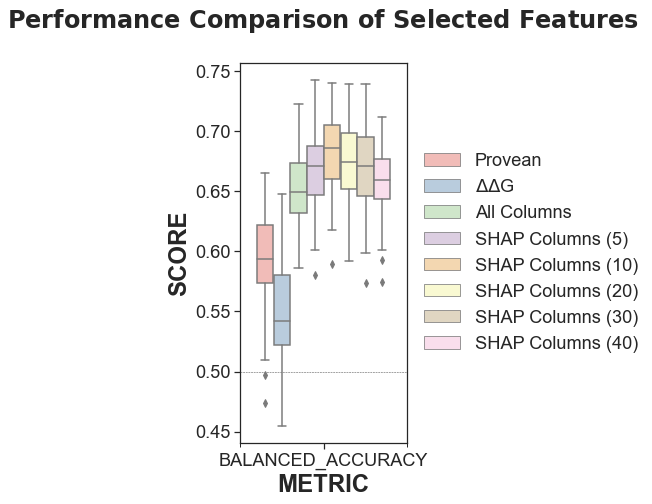

In [18]:
# metrics = ["F1", "BALANCED_ACCURACY", "ACCURACY", "PRECISION", "RECALL", "ROC_AUC"]
metrics = ["BALANCED_ACCURACY"]
predator.eval_metrics.plot_performance_comparison_results(metrics)
# last remained here: 23th oct night. -- this cell is almost completed (maybe squeeze the width a bit.)

In [25]:
def change_shap_top_names(feature_name: str):
    mapping = {
        'Provean': "Provean",
        '$\Delta\Delta$G': "$\Delta\Delta$G",
        'All Columns': "PREDATOR_all",
        'SHAP Columns (5)': "PREDATOR_SHAP_Top 5",
        'SHAP Columns (10)': "PREDATOR_SHAP_Top 10",
        'SHAP Columns (20)': "PREDATOR_SHAP_Top 20",
        'SHAP Columns (30)': "PREDATOR_SHAP_Top 30",
        'SHAP Columns (40)': "PREDATOR_SHAP_Top 40",
    }

    return mapping[feature_name]

In [26]:
foo = predator.eval_metrics.scoring_metrics_data_melted.copy()
foo["FEATURES"] = foo["FEATURES"].apply(lambda x: change_shap_top_names(x))
foo

,X_NAME,FEATURES,EXPERIMENT_NO,METRIC,SCORE
0,X_train_exp_0_provean,Provean,0,F1,0.3957
1,X_train_exp_0_ddG,$\Delta\Delta$G,0,F1,0.2854
2,X_train_exp_0,PREDATOR_all,0,F1,0.4969
3,X_train_exp_0_shap_5,PREDATOR_SHAP_Top 5,0,F1,0.5704
4,X_train_exp_0_shap_10,PREDATOR_SHAP_Top 10,0,F1,0.6410
...,...,...,...,...,...
83,X_train_exp_49_shap_5,PREDATOR_SHAP_Top 5,49,MCC,0.3563
84,X_train_exp_49_shap_10,PREDATOR_SHAP_Top 10,49,MCC,0.3063
85,X_train_exp_49_shap_20,PREDATOR_SHAP_Top 20,49,MCC,0.3194
86,X_train_exp_49_shap_30,PREDATOR_SHAP_Top 30,49,MCC,0.2667


Plot is exported.


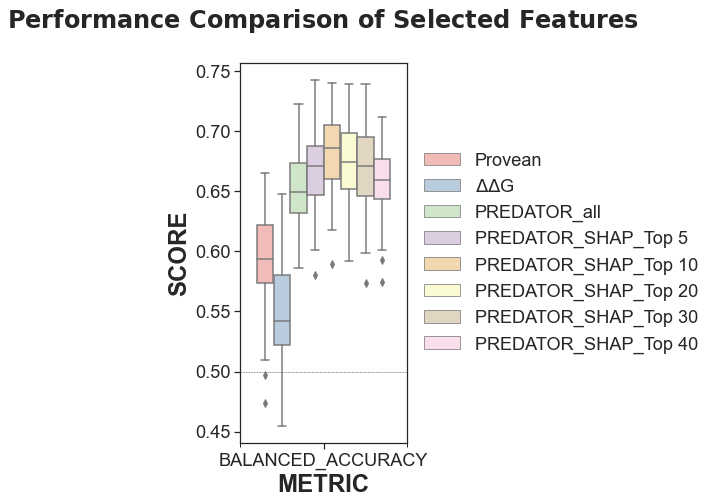

In [40]:
plot_performance_comparison_results(
    foo, metrics
)

Plot is exported.


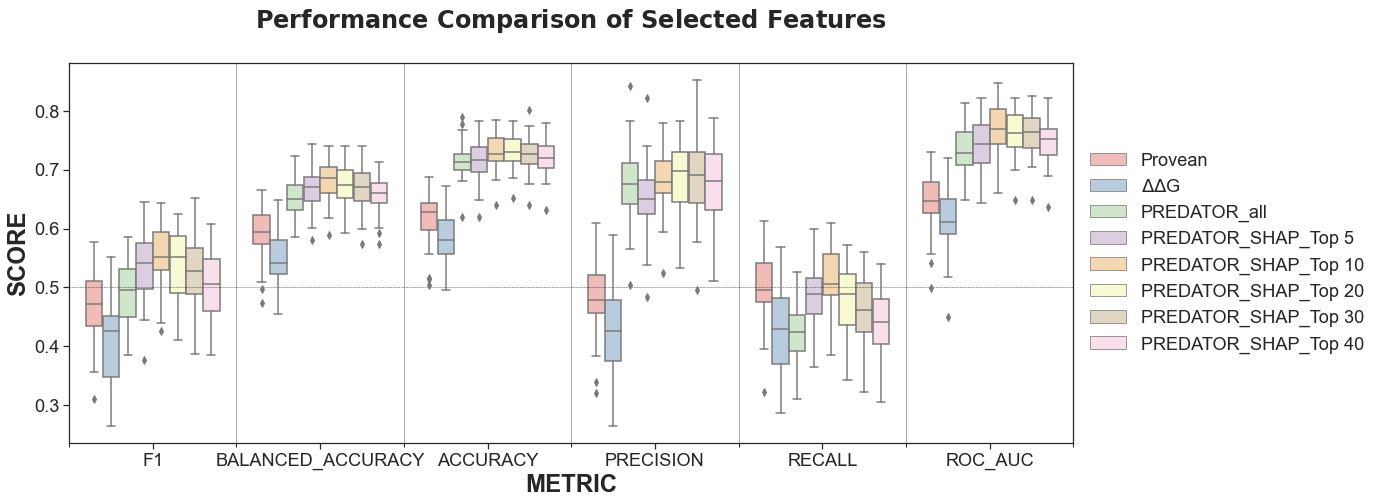

In [45]:
metrics = ["F1", "BALANCED_ACCURACY", "ACCURACY", "PRECISION", "RECALL", "ROC_AUC"]
plot_performance_comparison_results(
    foo, metrics
)

## Figure 4: removing qualified models and only balanced accuracy

In [47]:
scores_data = pd.read_clipboard()

In [48]:
scores_data

,Experiment,Acc_scores,Balan_acc_scores,Models_type
0,0,0.696970,0.619048,Tuned+FeatureSelected
1,1,0.696970,0.708333,Tuned+FeatureSelected
2,2,0.787879,0.761905,Tuned+FeatureSelected
3,3,0.727273,0.659091,Tuned+FeatureSelected
4,4,0.727273,0.681818,Tuned+FeatureSelected
5,5,0.666667,0.648810,Tuned+FeatureSelected
6,6,0.575758,0.559524,Tuned+FeatureSelected
7,7,0.727273,0.714286,Tuned+FeatureSelected
8,8,0.848485,0.840909,Tuned+FeatureSelected
9,9,0.727273,0.696429,Tuned+FeatureSelected


In [164]:
def comparison_across_model_types(scores, n_experiment):
    sns.set_theme(style="ticks", palette="Set3", font_scale=1.65)  # twilight_shifted_r
    # sns.set(style="ticks", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    
    default_data = pd.DataFrame({
        "Experiment": [e for e in range(n_experiment)],
        "Acc_scores": scores["initial_scoring"]["acc_scores"],
        "Balan_acc_scores": scores["initial_scoring"]["balan_acc_scores"],
        "Models_type": "Default"
    })

    feature_selected_data = pd.DataFrame({
        "Experiment": [e for e in range(n_experiment)],
        "Acc_scores": scores["feature_selected_scoring"]["acc_scores"],
        "Balan_acc_scores": scores["feature_selected_scoring"]["balan_acc_scores"],
        "Models_type": "Default+FeatureSelected"
    })

    tuned_data = pd.DataFrame({
        "Experiment": [e for e in range(n_experiment)],
        "Acc_scores": scores["finalized_scoring"]["acc_scores"],
        "Balan_acc_scores": scores["finalized_scoring"]["balan_acc_scores"],
        "Models_type": "Tuned+FeatureSelected"
    })
    
#     print("Default data:")
#     display(default_data.head())
#     print("= = = = = = = = =")
    
#     print("feature_selected data:")
#     display(feature_selected_data.head())
#     print("= = = = = = = = =")
    
#     print("tuned data:")
#     display(tuned_data.head())
#     print("= = = = = = = = =")
    
    df_melted = pd.concat(
        [default_data, feature_selected_data, tuned_data]
    ).melt(
        id_vars=['Experiment', 'Models_type'],
        value_vars=['Acc_scores', 'Balan_acc_scores'],
        var_name='METRIC',
        value_name='SCORES'
    )
    
#     print("melted data:")
#     display(df_melted.head())
#     print("= = = = = = = = =")
    
    df_melted_balan_acc = df_melted[
        df_melted["METRIC"] == "Balan_acc_scores"
    ]
    
    plt.figure(figsize=(6, 6))
    
    sns.boxplot(x='Models_type', y='SCORES', data=df_melted_balan_acc)
    # sns.boxplot(x='METRIC', y='SCORES', hue='Models_type', data=df_melted_balan_acc)#
    
    title_string_1 = fr"Performance\ on\ Validation\ Data"
    
    plt.title(f"$\mathbf{{{title_string_1}}}$", fontsize=16, fontweight='bold')
    plt.ylabel("Balanced acc scores")
    plt.xlabel("Model Type")
    plt.xticks(ha='right', rotation=45)
    
    filename = "figures/performance_comparison_validation_data.pdf"
    if op.isfile(filename):
        raise FileExistsError
    plt.savefig(filename, dpi=300, bbox_inches='tight') 
    print("Plot is exported.")
    
    plt.show()

Plot is exported.


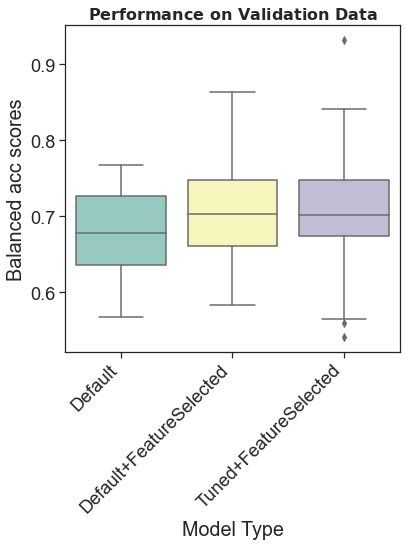

In [165]:
comparison_across_model_types(predator.eval_valid.scores, predator.n_experiment)

## Figure 3: aggregated top 10 feature distribution

In [168]:
def visualize_distribution_top_n_features(shap_feature_selector, top_n):
    # plt.figure(figsize=(12, 12))  # poster purpose
    # sns.set(style='white', font_scale=2.5)  # poster purpose
    feature_to_counts = {}
    for feature in shap_feature_selector.n_features_to_aggregated_features[top_n]:
        count = (shap_feature_selector.aggregated_feature_selector
                 .n_features_to_selected_features_occurrences_counts[top_n])[feature]
        feature_to_counts[feature] = count

    counts_data = pd.DataFrame(feature_to_counts, index=['counts'])
    counts_data = pd.melt(counts_data, var_name='FEATURES', value_name='COUNTS')
    sns.barplot(x='FEATURES', y='COUNTS', color="#4C4C4C", data=counts_data)
    plt.title(f'Distribution of top-{top_n} features', fontweight="bold")
    plt.xlabel(None)
    plt.xticks(ha='right', rotation=45)

    sns.despine(right=True)
    # plt.tight_layout() # poster purpose
    # plt.savefig('foo.png')  # poster purpose
    
    filename = "figures/distribution_of_top_10_features.pdf"
    if op.isfile(filename):
        raise FileExistsError
    plt.savefig(filename, dpi=300, bbox_inches='tight') 
    print("Plot is exported.")
    
    plt.show()

Plot is exported.


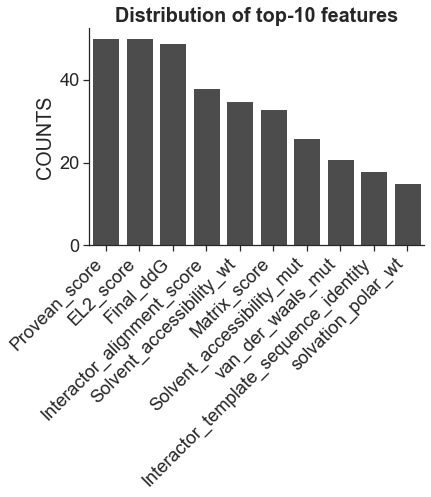

In [169]:
visualize_distribution_top_n_features(predator.shap_feature_selector, 10)  # available for each shap_top_ns.

## Figure Shap: to pdf

Plot is exported.


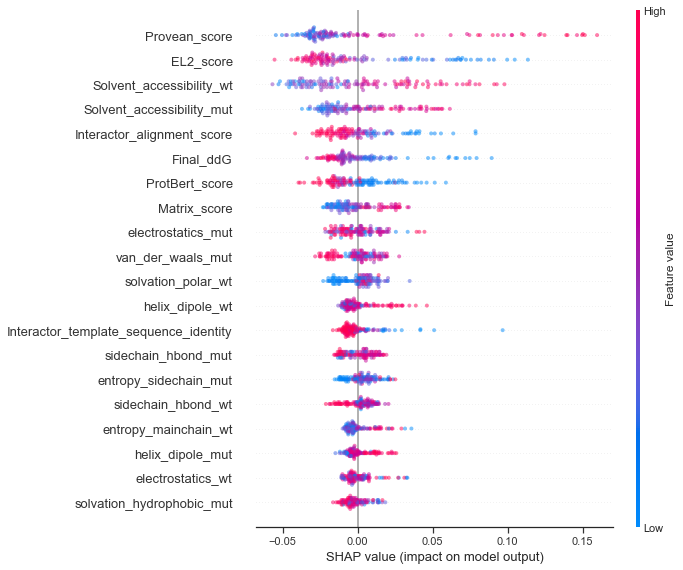

In [187]:
# maybe i can add the title and the names of the axis (later)
import shap


fig = shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[38][1], 
    predator.data_materials["Xs_train"][38],
    show=False,
    alpha=0.5,
)

filename = "figures/shap_summary_plot.pdf"
# if op.isfile(filename):
#     raise FileExistsError
plt.savefig(filename, dpi=300, bbox_inches='tight') 
print("Plot is exported.")

## Prediction TCGA on Cancer Dataset: OV

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('ov', OV_PATH)]
)

2021-11-17 16:37:29 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `ov` ..
2021-11-17 16:37:29 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_ov_data` ..
2021-11-17 16:37:30 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-17 16:37:30 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-17 16:37:30 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_ov data materials  ..


#### TCGA Cancer Datasets

##### OV

In [4]:
display_data(predator.data_materials["ov"])

Data dimensions: (5092, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


#### Preprocessed TCGA Cancer Datasets

##### OV

In [5]:
display_data(predator.data_materials["target_ov_data"])

Data dimensions: (5092, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,D59E,P52565,0.9263,0.915529,0.9394,0.914711,1.492640,0.999329,0.046801,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.880,3.18062,3.18062
1,P08134,D59E,P52565-2,0.9263,0.915529,0.7222,0.708487,0.762694,0.999029,0.004062,...,344.0,62.3140,63.0691,32.5038,32.5038,598.710,417.740,1016.460,3.80414,3.80414
2,P62993,A3V,Q9H8V3-2,0.4444,0.463595,0.2792,0.262235,1.964490,-0.080548,0.456549,...,280.0,23.2774,24.5177,122.5120,122.5120,170.810,120.515,291.325,4.63364,4.63364


### Voting mode: `soft`

In [6]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('ov', OV_PATH)]
)

2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `ov` ..
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_ov_data` ..
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_ov data materials  ..


In [7]:
predator.predict(voting='soft')

2021-11-17 16:37:44 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2021-11-17 16:37:44 | DEBUG    | Predator | Predicting on ov cohort ..
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.models | X shape: (5092, 10)
2021-11-17 16:37:45 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2, n

In [8]:
predator.predictions.keys()

dict_keys(['ov_prob'])

In [9]:
# Predictions for first 10 experiment.
predator.predictions["ov_prob"][:3]

[array([[0.59952734, 0.40047266],
        [0.63188723, 0.36811277],
        [0.52475222, 0.47524778],
        ...,
        [0.65248365, 0.34751635],
        [0.67623588, 0.32376412],
        [0.65464449, 0.34535551]]),
 array([[1.        , 0.        ],
        [1.        , 0.        ],
        [0.43333333, 0.56666667],
        ...,
        [1.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 0.        ]]),
 array([[0.78724328, 0.21275672],
        [0.82463448, 0.17536552],
        [0.6362759 , 0.3637241 ],
        ...,
        [0.77263679, 0.22736321],
        [0.70747215, 0.29252785],
        [0.72762164, 0.27237836]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [10]:
predator.predictions_post_process()

2021-11-17 16:37:52 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:37:52 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort ov ..
2021-11-17 16:37:52 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:37:52 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with ov cancer dataset ..
2021-11-17 16:37:52 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-17 16:38:13 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 655): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.539514  P00742    I451M     P10646
1    0.449693  P00742    I451M     P10646
2    0.449693  P00742    I451M     P10646
3    0.537670  P00742    I451M     P10646
4    0.537670  P00742    I451M     P10646
2021-11-17 16:38:34 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 611): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0         0.0  Q14814     K31T     Q02078
1         1.0  Q14814     K31T     Q02078
2         0.0  Q14814     K31T     Q02078
3         1.0  Q14814     K31T     Q02078
4         0.0  Q14814     K31T     Q02078
2021-11-17 16:38:54 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 582): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.440924  Q9NQ66    E539K     Q15147
1    0.514262  Q9NQ66    E539K     Q15147
2    0.

In [11]:
predator.predictions.keys()

dict_keys(['ov_prob', 'ov_predicted_probs_datasets', 'ov_predicted_valid_datasets', 'ov_predicted_invalid_datasets', 'ov_finalized_prediction_dataframes'])

In [12]:
display_data(predator.predictions["ov_predicted_probs_datasets"][0])

Data dimensions: (5092, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.400473,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,0.368113,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,0.475248,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


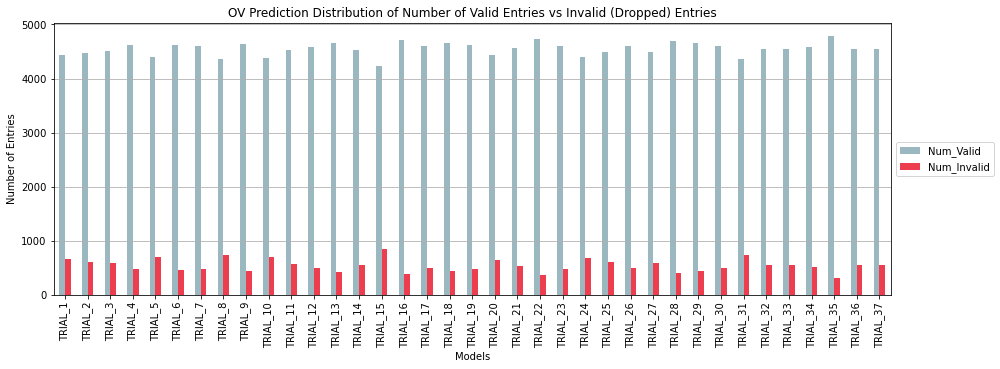

In [13]:
predator.predictions.plot_distribution_valid_vs_invalid("ov")

2021-11-17 16:51:47 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


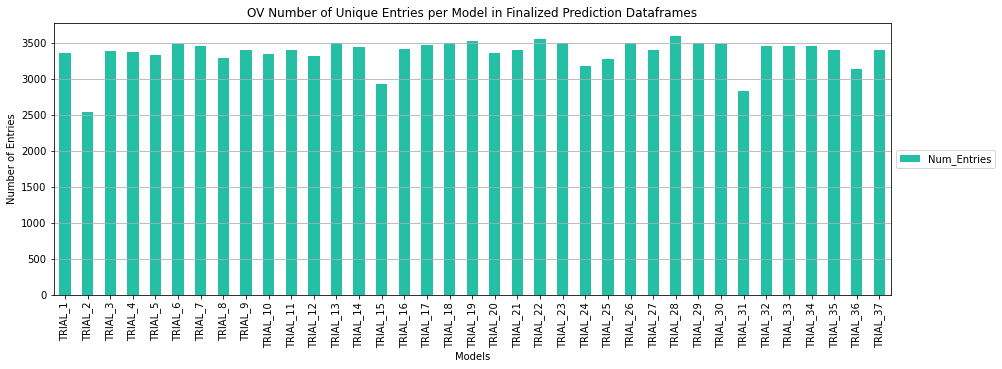

In [14]:
predator.predictions.plot_num_finalized_predictions("ov")

In [15]:
display_data(predator.predictions['ov_finalized_prediction_dataframes'][0])

Data dimensions: (3360, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.400473,P08134,D59E,P52565
1,0.368113,P08134,D59E,P52565
2,0.475248,P62993,A3V,Q9H8V3


In [16]:
predator.prepare_ensemble_prediction_data()

2021-11-17 16:51:48 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:51:48 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for ov taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-17 16:56:29 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for ov is prepared.
Accessible from `ov_predictions_prob_data`.
2021-11-17 16:56:29 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for ov is prepared.
Accessible from `ov_ensemble_prediction_data`.
2021-11-17 16:56:29 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for ov.
Accessible from predictions.['ov_prediction_results']
2021-11-17 16:56:29 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for ov.
Accessible from predictions.['ov_prediction_results_no_votes_dropped']


In [17]:
display_data(predator.predictions['ov_predictions_prob_data'])

Data dimensions: (2582, 39)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.384293,0.0,0.194061,0.349944,0.170285,0.350122,0.464967,0.118365,0.233145,0.387556,...,0.151618,0.197612,0.218545,0.419339,0.370928,0.356374,0.312893,0.329366,0.28821,0
1,0.475248,0.566667,0.363724,0.487851,0.533333,0.588556,0.443974,0.277278,0.443032,0.453923,...,0.611111,0.573617,0.348948,0.595144,0.436047,0.553531,0.433921,0.506438,0.44397,0
2,0.561579,0.566667,0.310791,0.483148,0.603261,0.701266,0.51214,0.309409,0.614093,0.567638,...,0.644444,0.373617,0.360463,0.639978,0.541017,0.683096,0.640331,0.423847,0.51214,1


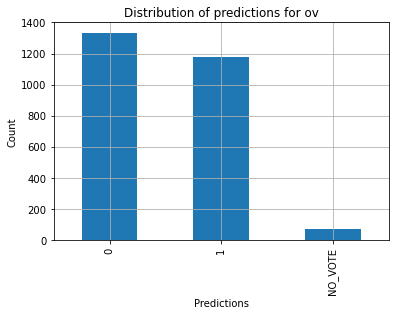

In [18]:
predator.predictions.plot_ensemble_prediction_distribution("ov")

In [19]:
ov_prediction_results_soft = predator.predictions['ov_prediction_results']
display_data(ov_prediction_results_soft)

Data dimensions: (2582, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1


In [20]:
ov_prediction_results_soft_no_votes_dropped = predator.predictions["ov_prediction_results_no_votes_dropped"]
display_data(ov_prediction_results_soft_no_votes_dropped)

Data dimensions: (2513, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1


Label counts:
Disrupting                1334
Increasing + No Effect    1179
Name: Prediction, dtype: int64


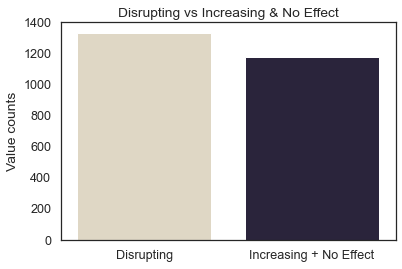

In [21]:
visualize_label_counts(ov_prediction_results_soft_no_votes_dropped, 'Prediction')

In [22]:
ov_ensemble_prediction_data_soft = predator.predictions["ov_ensemble_prediction_data"]

In [23]:
ov_predictions_prob_data_soft = predator.predictions["ov_predictions_prob_data"]

In [24]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [25]:
ov_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["ov_prediction_results"],
    predictions_prob_data=predator.predictions["ov_predictions_prob_data"]
)
ov_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P08134,D59E,P52565,0,0.28821
1,P62993,A3V,Q9H8V3,0,0.44397
2,P62993,A3V,Q14155,1,0.51214
3,O75175,Q684H,Q9NZN8,0,0.32091
4,O75175,Q684H,B2RDX7,0,0.3347


In [26]:
ov_prediction_results_soft_no_votes_dropped_with_median_probabilities = ov_prediction_results_soft_with_median_probs[
    ov_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [27]:
len(ov_prediction_results_soft_no_votes_dropped_with_median_probabilities)

2513

## Exporting Predictions

In [28]:
# ov_prediction_results = ov_prediction_results_hard_no_votes_dropped
# ov_prediction_results = ov_prediction_results_soft_no_votes_dropped
ov_prediction_results = ov_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(ov_prediction_results)

Data dimensions: (2513, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P08134,D59E,P52565,0,0.28821
1,P62993,A3V,Q9H8V3,0,0.44397
2,P62993,A3V,Q14155,1,0.51214


In [29]:
predator.export_prediction(
    tcga="ov",
    data=ov_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2021-11-17 16:59:08 | DEBUG    | helpers.helpers_predator.common | Folder with ID 37bf1637 is created.
2021-11-17 16:59:08 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder ov_prediction_2021-11-17\37bf1637..
2021-11-17 16:59:08 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/ov_prediction_2021-11-17\37bf1637\predictions_soft_2021-11-17.csv is exported successfully.
2021-11-17 16:59:08 | INFO     | helpers.helpers_predator.common | Config is exported.


---